---
---

<h1><center><ins>Exercise Sheet 11</ins></center></h1>
<h2><center>Numerical Methods <br>

---
---

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import log

In this exercise sheet you have to solve the 1D advection equation using different methods discussed in the lecture. The 1D advection equation is as follows:

$$
\frac{\partial q}{\partial t} + c \frac{\partial q}{\partial x} = 0,
$$

where $q(x, t)$ is the quantity being advected and $c$ is the constant advection velocity.

Use the following initial conditions in each of the exercises. For this set the solutions look the best:

## Exercise 1: Central Differencing Scheme 

In the following you have to solve the 1D linear advection equation using the **central differencing scheme**. The central differencing scheme uses centered differencing for spatial derivatives

$$
q_i^{n+1} = q_i^n - \frac{c \Delta t}{2 \Delta x} \left(q_{i+1}^n - q_{i-1}^n\right),
$$

where $n$ represents the current time step and $i$ represents the spatial index. This method is second-order accurate in space but is unconditionally unstable for the 1D advection equation. **Show that the scheme is indeed unconditionally unstable**, i.e. that the scheme is always unstable.

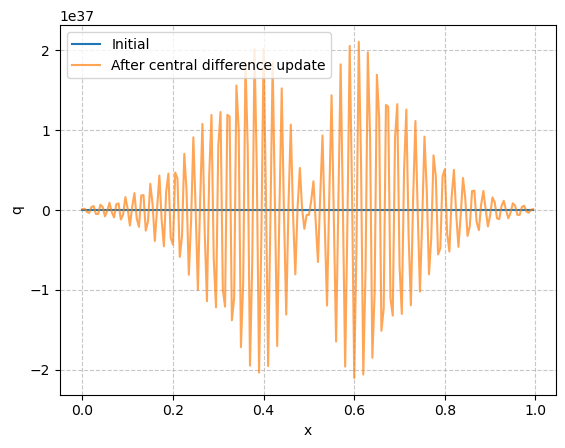

In [2]:
# Initial condition: Step function
L = 1.0  # Length of the domain
N = 200  # Number of grid points
c = 1  # Advection velocity
T = 2.0  # Total simulation time
dx = L / N  # Spatial resolution
dt = 0.5 * dx / c  # Time step (CFL condition)

x = np.linspace(0, L, N, endpoint=False)
q0 = np.zeros_like(x)
q0[(x >= 0.4) & (x < 0.6)] = 1.0



q = q0.copy()
n_steps = int(T / dt)

for n in range(n_steps):
    q_new = q.copy()

    # central difference formula
    for i in range(1, N-1):
        q_new[i] = q[i] - (c*dt/(2*dx))*(q[i+1] - q[i-1])

    # Boundary conditions
    q_new[0]   = q[0]   - (c*dt/(2*dx))*(q[1] - q[-1])
    q_new[-1]  = q[-1]  - (c*dt/(2*dx))*(q[0] - q[-2])

    q = q_new

# Plot result
plt.plot(x, q0, label='Initial')
plt.plot(x, q,  label='After central difference update', alpha=0.7)
plt.legend()
plt.xlabel('x')
plt.ylabel('q')
plt.grid(alpha=0.7, ls='--')
plt.show()


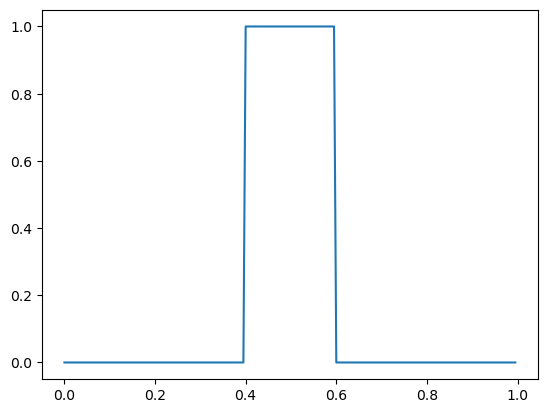

In [3]:
plt.plot(x, q0, label='Initial')

## Exercise 2: Upstream Differencing Scheme 

Now please solve the 1D advection equation using the **upstream differencing scheme**. The upstream differencing scheme is a first-order accurate numerical method that uses one-sided differencing for spatial derivatives. It is expressed as:

$$
q_i^{n+1} = q_i^n - \frac{c \Delta t}{\Delta x} \left(q_i^n - q_{i-1}^n\right),
$$

where $n$ again represents the current time step and $i$ represents the spatial index. **Show that this scheme is stable**, but that the
solution is diffusive, i.e. that the numerical solution artificially smooths out or blurs the sharp gradients and details in the solution as it evolves over time.

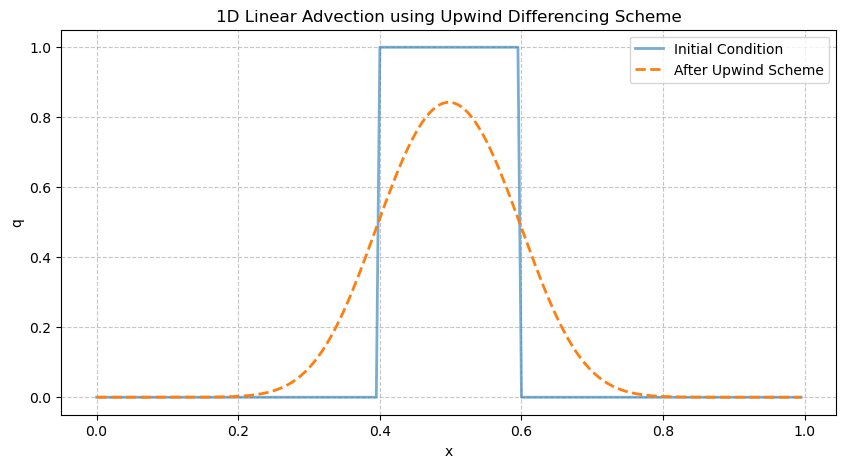

In [4]:
L = 1.0  # Length of the domain
N = 200  # Number of grid points
c = 1    # Advection velocity
T = 2.0  # Total simulation time
dx = L / N    # Spatial resolution
dt = 0.5 * dx / c  

x = np.linspace(0, L, N, endpoint=False)
q0 = np.zeros_like(x)
q0[(x >= 0.4) & (x < 0.6)] = 1.0

# Initialize solution
q = q0.copy()
n_steps = int(T / dt)

# Time-stepping loop
for n in range(n_steps):
    q_new = q.copy()
    
    # Upstream (Upwind) Differencing Scheme
    for i in range(1, N):
        q_new[i] = q[i] - (c * dt / dx) * (q[i] - q[i-1])
    
    # Boundary condition
    # For i = 0, q_{-1} refers to q_{N-1}
    q_new[0] = q[0] - (c * dt / dx) * (q[0] - q[-1])
    
    q = q_new


plt.figure(figsize=(10, 5))
plt.plot(x, q0, label='Initial Condition', linewidth=2, alpha=0.6)
plt.plot(x, q, label='After Upwind Scheme', linewidth=2, ls='--')
plt.xlabel('x')
plt.ylabel('q')
plt.title('1D Linear Advection using Upwind Differencing Scheme')
plt.legend()
plt.grid(alpha=0.7, linestyle='--')
plt.show()


## Optional: Two-Step Lax-Wendroff Algorithm Implementation


The two-step Lax-Wendroff algorithm is also a numerical method for solving the 1D linear advection equation. It can be expressed as follows:

**Predictor Step:** Calculate fluxes at half-time steps using the Lax-Friedrichs method at staggered points:

$$
q_{i+1/2}^{n+1/2} = \frac{q_i^n + q_{i+1}^n}{2} - \frac{c \Delta t}{2 \Delta x} \left(q_{i+1}^n - q_i^n\right).
$$

**Corrector Step:** Update the cell-centered values using the fluxes at half-time steps:

$$
q_i^{n+1} = q_i^n - \frac{c \Delta t}{\Delta x} \left(q_{i+1/2}^{n+1/2} - q_{i-1/2}^{n+1/2}\right).
$$

Here you can either implement the more complicated **a)** two-step predictor-corrector version shown above, **or b)** a one-step simpler version.